# Day 2 : Feature Scaling

part of the data preprocessing

> adjusts feature ranges to similar scales
> prevents large-valued features from dominating others
> Imp for KNN, SVM, Neural Networks
> Ensures fair contribution of all the features
> eg. age(18-800 vs income(10000-200000)



### Normalization (Min-max scaling)

> rescales values into [0,1] range.
> formula: (x-x_min)/(x_max - x_min)
> used when data is not normally distributed
> used in distance-based models like KNN, Neural Nets.
> eg. age = 50, min = 20, max = 80 -> 0.5

### Standardization (Zscore scaling)

> Centes data : mean = 0, std=1.
> formula: (x - mean) / std
> used when data is normally distributed
> used in linear models like SVM, Regression
> Example: age = 50, mean = 40, std=10 -> 1.0

### Normalization vs Standardization

> Normalization:    [0,1] range, sensitive outliers.        Keeps Shape
> Standardization: mean = 0, std = 1, no fixed range.       keeps
>

## Label Encoding

> coverts categorical data (string/text) into numeric form.
> each category gets a unique number
> useful for ordered data like small < medium < large

```
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Color_encoded'] = le.fit_transform(df['Color'])
```

## One-Hot Encoding

> converts categorical data in multiple binary(0/1) columns.
> no numeric order - ideal for non-ordinal data likecolor, cities, etc.

```
pd.get_dummis(df, columns=['Color'])
```

In [53]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("../DataSets/ecommerce_customers_unit1.csv")
df

,customer_id,age,gender,country,signup_date,last_purchase_date,num_orders,total_spent,avg_order_value,recency_days,is_premium_member,device_type,preferred_category,churned
0,10001,56.0,Male,India,2022-01-27,2024-04-27,10,13273.25,1327.32,522,0,NaN,Home,0
1,10002,69.0,Other,UK,2025-01-12,2025-08-01,10,NaN,308.90,61,0,Mobile,Grocery,0
2,10003,46.0,Female,USA,2021-04-25,2021-06-01,5,3411.83,682.37,1583,0,NaN,NaN,0
3,10004,32.0,Male,India,2021-02-23,2023-09-22,5,4502.00,900.40,740,0,NaN,NaN,0
4,10005,60.0,Female,India,2021-06-07,2021-12-11,7,3842.10,548.87,1390,0,Tablet,Books,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,10358,25.0,Female,India,2023-09-04,2025-06-18,7,NaN,0.00,105,1,Mobile,Electronics,0
601,10117,50.0,Male,USA,2024-05-11,2024-11-08,4,3640.07,910.02,327,0,Mobile,Electronics,0
602,10599,46.0,Male,India,2020-12-01,2024-06-25,6,2176.22,362.70,463,1,Desktop,Electronics,0
603,10442,32.0,Female,UK,2023-12-20,2024-09-20,3,5478.65,1826.22,376,0,Mobile,Home,0


In [55]:
target = df.isna().sum().sort_values(ascending=False)
target

gender                34
total_spent           34
country               32
device_type           30
age                   28
preferred_category    22
last_purchase_date     0
signup_date            0
customer_id            0
num_orders             0
recency_days           0
avg_order_value        0
is_premium_member      0
churned                0
dtype: int64

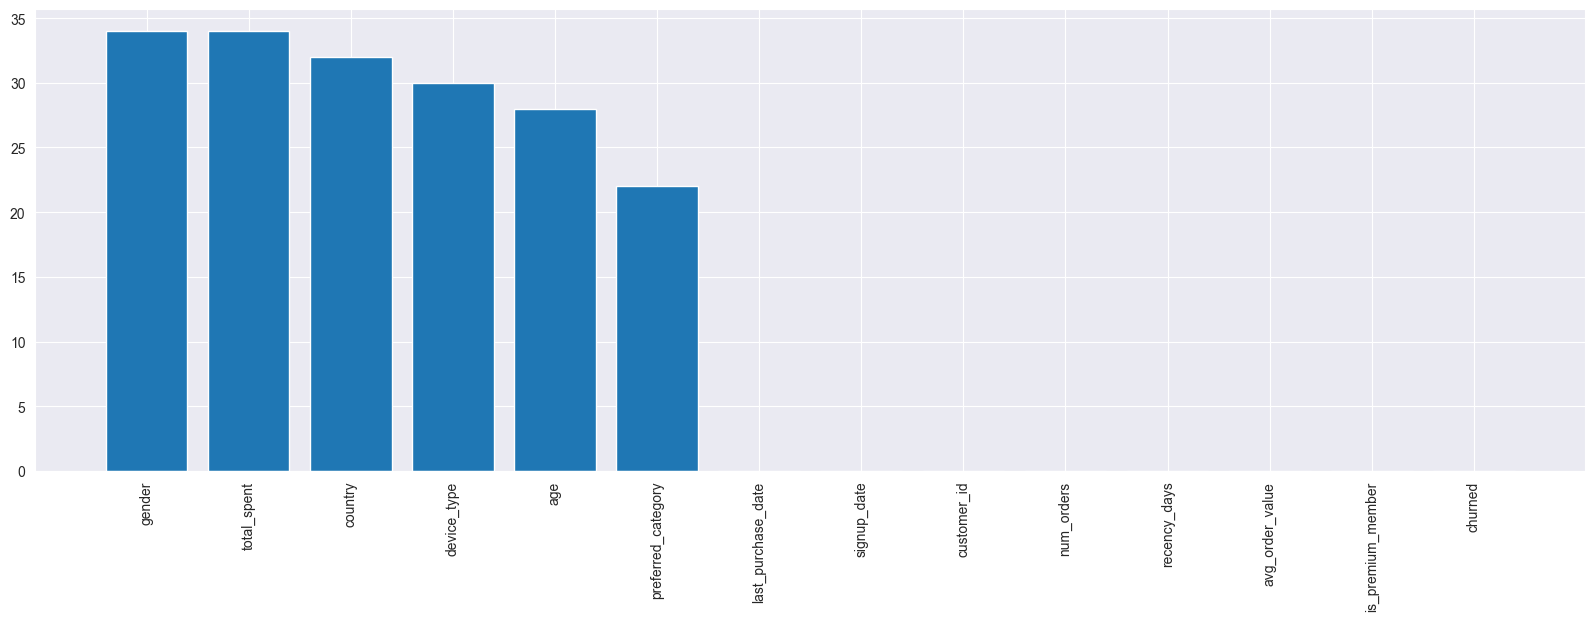

In [56]:
#barplot using plt

plt.figure(figsize=(20, 6))
plt.bar(target.index, target)
plt.xticks(rotation=90)
plt.show()

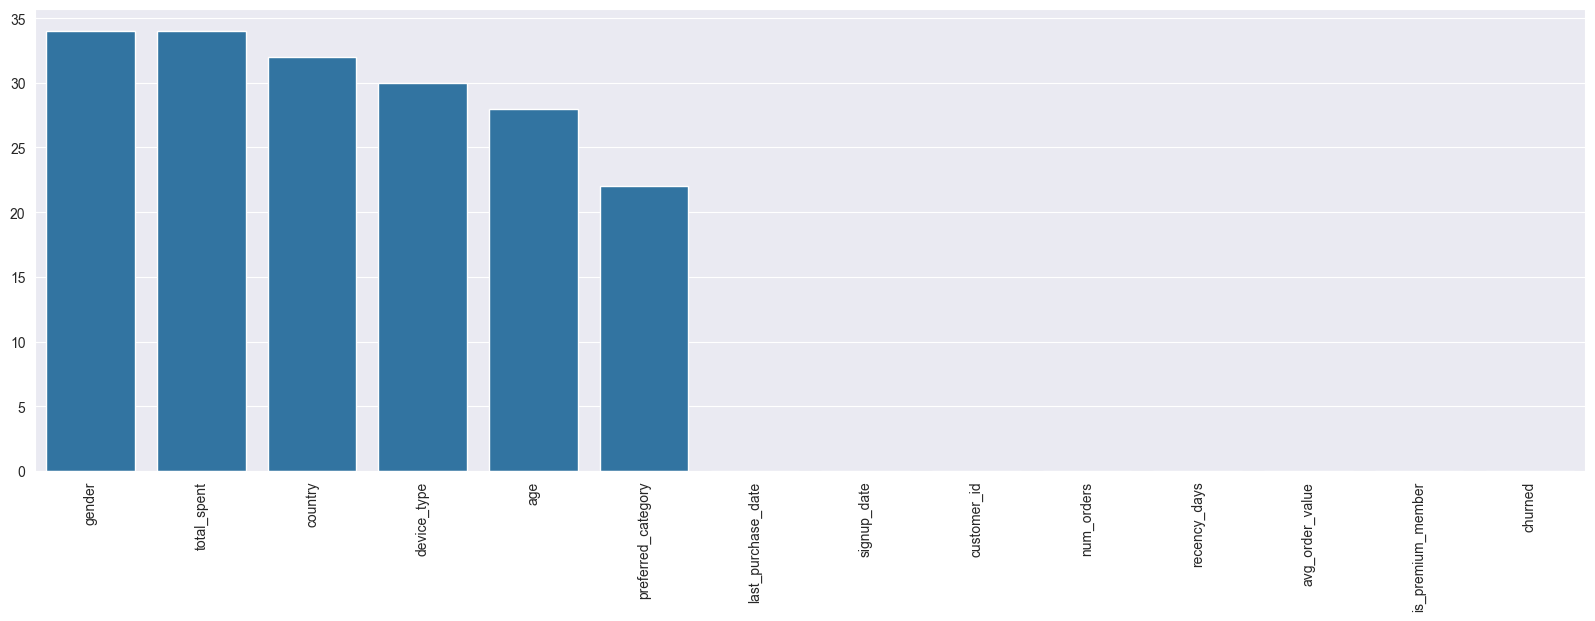

In [57]:
#barplot using sns

plt.figure(figsize=(20, 6))
sns.barplot(target)
plt.xticks(rotation=90)
plt.show()

In [58]:
#before finding outlier gotta handle the null values and select only numeric vals
df = df.select_dtypes(include=[np.number, np.float64])

df.fillna(df.mean(), inplace=True)
df.isna().sum()

customer_id          0
age                  0
num_orders           0
total_spent          0
avg_order_value      0
recency_days         0
is_premium_member    0
churned              0
dtype: int64

In [59]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3 - q1

out = df[(df < q1 - 1.5 * iqr) | (df > q3 + 1.5 * iqr)]
out.count()

customer_id           0
age                   0
num_orders            5
total_spent          23
avg_order_value      15
recency_days         10
is_premium_member     0
churned              22
dtype: int64

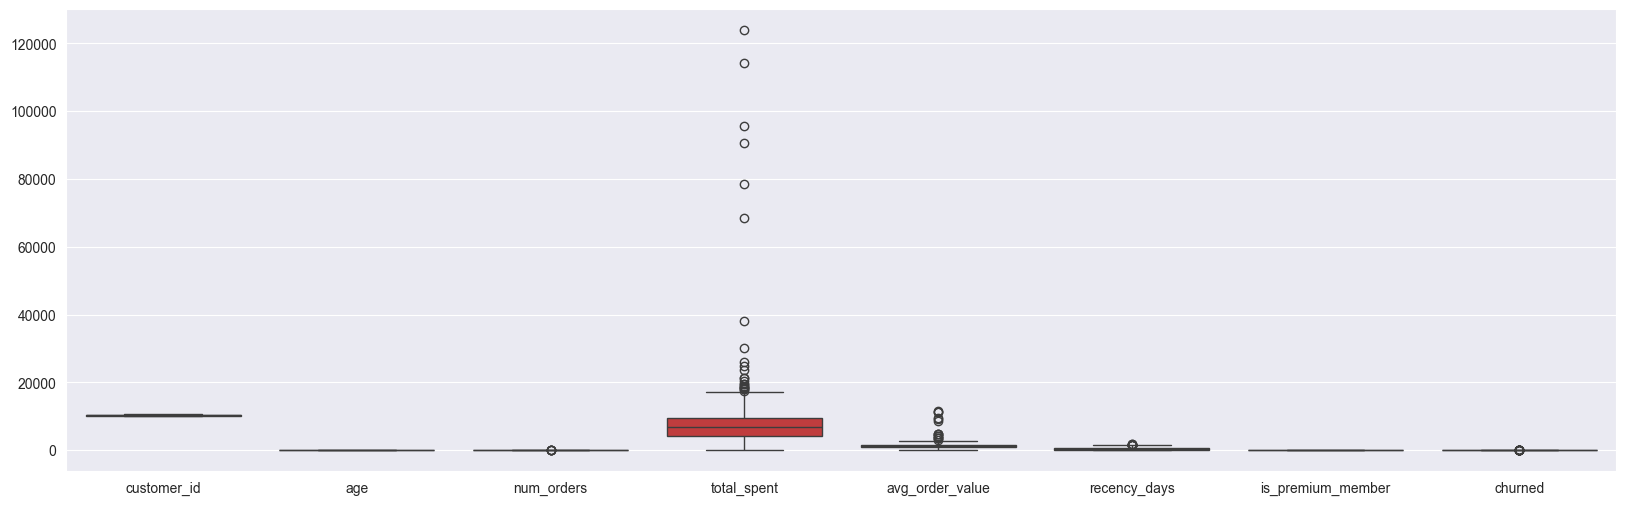

In [60]:
plt.figure(figsize=(20, 6))
sns.boxplot(df)

plt.show()

In [61]:
df['age']

0      56.0
1      69.0
2      46.0
3      32.0
4      60.0
       ... 
600    25.0
601    50.0
602    46.0
603    32.0
604    44.0
Name: age, Length: 605, dtype: float64

In [63]:
# applying normalization on age column

age_min = df['age'].min()
age_max = df['age'].max()

print(age_min, age_max)

df['normalized_age'] = df['age'].apply(lambda x: (x - age_min) / (age_max - age_min))
df['normalized_age']

18.0 69.0


0      0.745098
1      1.000000
2      0.549020
3      0.274510
4      0.823529
         ...   
600    0.137255
601    0.627451
602    0.549020
603    0.274510
604    0.509804
Name: normalized_age, Length: 605, dtype: float64

In [65]:
df['age']

0      56.0
1      69.0
2      46.0
3      32.0
4      60.0
       ... 
600    25.0
601    50.0
602    46.0
603    32.0
604    44.0
Name: age, Length: 605, dtype: float64

In [78]:
age_std = df['age'].std()
age_mean = df['age'].mean()

df['standardized_age'] = df['age'].apply(lambda x: ((x - age_mean) / age_std))
print(f"Mean of standardized_age: {df['standardized_age'].mean():.16f}")

Mean of standardized_age: -0.0000000000000004


# todays agenda

In [85]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [89]:
data = {
    'Age' : [18, 22, 45, 60, 80],
    'Income' : [2000, 3000, 10000, 40000, 80000]
}

dummy_df = pd.DataFrame(data)

#normalization
norm = MinMaxScaler()
dummy_df_norm = pd.DataFrame(norm.fit_transform(dummy_df), columns=dummy_df.columns)

#standardization
std = StandardScaler()
dummy_df_std = pd.DataFrame(std.fit_transform(dummy_df), columns=dummy_df.columns)


print("original: \n", dummy_df)
print("normalized: \n", dummy_df_norm)
print("standardized: \n", dummy_df_std)

original: 
    Age  Income
0   18    2000
1   22    3000
2   45   10000
3   60   40000
4   80   80000
normalized: 
         Age    Income
0  0.000000  0.000000
1  0.064516  0.012821
2  0.435484  0.102564
3  0.677419  0.487179
4  1.000000  1.000000
standardized: 
         Age    Income
0 -1.160177 -0.836312
1 -0.988299 -0.802860
2  0.000000 -0.568692
3  0.644543  0.434882
4  1.503934  1.772982


In [93]:
#normalization and standardization on numeric rows of ecoomerce data
df_norm = pd.DataFrame(norm.fit_transform(df), columns=df.columns)
df_std = pd.DataFrame(std.fit_transform(df), columns=df.columns)

print("original: \n", df)
print("normalized: \n", df_norm)
print("standardized: \n", df_std)


original: 
      customer_id   age  num_orders   total_spent  avg_order_value  \
0          10001  56.0          10  13273.250000          1327.32   
1          10002  69.0          10   8059.212137           308.90   
2          10003  46.0           5   3411.830000           682.37   
3          10004  32.0           5   4502.000000           900.40   
4          10005  60.0           7   3842.100000           548.87   
..           ...   ...         ...           ...              ...   
600        10358  25.0           7   8059.212137             0.00   
601        10117  50.0           4   3640.070000           910.02   
602        10599  46.0           6   2176.220000           362.70   
603        10442  32.0           3   5478.650000          1826.22   
604        10555  44.0           6   5408.130000           901.36   

     recency_days  is_premium_member  churned  normalized_age  \
0             522                  0        0        0.745098   
1              61            